# TO DO LIST

* link temperature to number of episods
* introduce Dirichlet distribution
* develop metrics to measure computational costs
* run experiments
* Try a bigger board?
* Formatting
* Names to shorten

# Import libraries / modules

In [1]:
# Python libraries
from math import *
from collections import deque

# 3rd party libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
#!conda install progressbar2
import progressbar as pb
import matplotlib.pyplot as plt

# Game-related libraries
import games_mod # Games
import mcts # MCTS search
import policy_mod # neural network
from play_mod import Play
import training_mod
from game_utils import policy_player_mcts, random_player, DotDict

# Game, Training and Play Settings

In [2]:
# Game settings
game_settings = DotDict({
    "board_size": (3,3),
    "N": 3
})

# Self-play training settings
game_training_settings = DotDict({
    "comp_interval":100,
    "episods": 200,
    "explore_steps": 20,
    "temperature_sch": np.array([[300, 0.3], [10000, 0.01]]) #[x,y] means "up to x episods, applies y temperature"
})
# neural network settings
nn_training_settings = DotDict({
    "load_policy": False,
    "ai_ckp": "",
    "lr": .01, 
    "weight_decay": 1.e-4,
})

# play settings
play_settings = DotDict({
    "explore_steps": 50,
    "temperature": 0.01                         
})

# Training the AI (Optional)

In [3]:
game=games_mod.ConnectN(game_settings)
policy = policy_mod.Policy()

In [4]:
alpha_0 = training_mod.AlphaZeroTraining(
    game_settings, 
    game_training_settings, 
    nn_training_settings, 
    policy)

training loop:  25% |##########                                | ETA:   0:00:10

game:  50 , mean loss: 6.74 , Last 10 Results:  [1, 0, 1, -1, 0, 1, 0, 0, 1, 1]


training loop:  50% |#####################                     | ETA:   0:00:07

game:  100 , mean loss: 6.02 , Last 10 Results:  [1, 0, 1, -1, 1, 1, 1, 1, 1, 0]


training loop:  76% |###############################           | ETA:   0:00:03

game:  150 , mean loss: 6.71 , Last 10 Results:  [0, 1, -1, 1, 0, 0, 1, 0, 1, 1]


training loop: 100% |##########################################| Time:  0:00:14


game:  200 , mean loss: 6.56 , Last 10 Results:  [-1, 1, 0, 1, 1, 1, -1, 1, 0, 0]


<IPython.core.display.Javascript object>


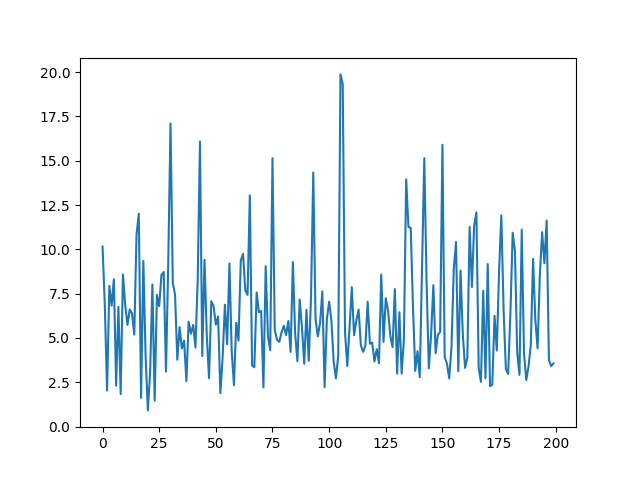

In [5]:
losses = alpha_0.get_losses()
%matplotlib notebook
plt.plot(losses)
plt.show()

# Playing agains AI

Below is a visualization of a game with 2 players who can either be humans or AIs. 
Player1 means the player who will start the game.
Set player 1 = None or player2 = None for player 1 or player 2 to be played by humans. Otherwise, set a function that takes a game as an input and returns a position.

<IPython.core.display.Javascript object>


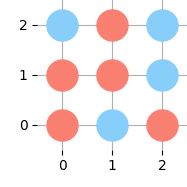

In [8]:
%matplotlib notebook
gameplay=Play(games_mod.ConnectN(game_settings), 
              player2=policy_player_mcts, 
              player1=policy_player_mcts, 
              visual = True)

# Competition between 2 AIs

In [9]:
number_matches = 100
total_wins = 0
total_losses = 0

for _ in range(number_matches):
    game = games_mod.ConnectN(game_settings)
    player1 = policy_player_mcts
    player2 = random_player
    curr_player = player1
    score = None

    while score is None:
        loc = curr_player(game)
        succeed = game.move(loc)
        if succeed:
            score=game.score
            if curr_player == player1:
                curr_player = player2
            else:
                curr_player = player1
    if score == 1:
        total_wins+=score
    elif score == -1:
        total_losses+=-score
    
print ("Total wins / losses of Player 1 : {} / {}".format(total_wins, total_losses))


Total wins / losses of Player 1 : 100 / 0
